In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [2]:
# (Some of this code is the same as first problem for this part )

X = data.drop(columns='Outcome')
y = data['Outcome']

# Standardizing all of the predictors
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# model creation
model = LogisticRegression(max_iter=1000)
model.fit(X_scaled, y)

# Make predictions
y_pred = model.predict(X_scaled)
y_pred_prob = model.predict_proba(X_scaled)[:,1]

# Confusion matrix alongside each of the possible outputs
cm = confusion_matrix(y, y_pred)
tn, fp, fn, tp = cm.ravel()

# Calculate error rate, sensitivity, specificity
error_rate = (fp + fn) / len(y)
sensitivity = tp / (tp + fn)  # True Positive Rate (recall)
specificity = tn / (tn + fp)  # True Negative Rate

print(f'Error Rate: {error_rate}')
print(f'Sensitivity: {sensitivity}')
print(f'Specificity: {specificity}')

Error Rate: 0.21614583333333334
Sensitivity: 0.582089552238806
Specificity: 0.892


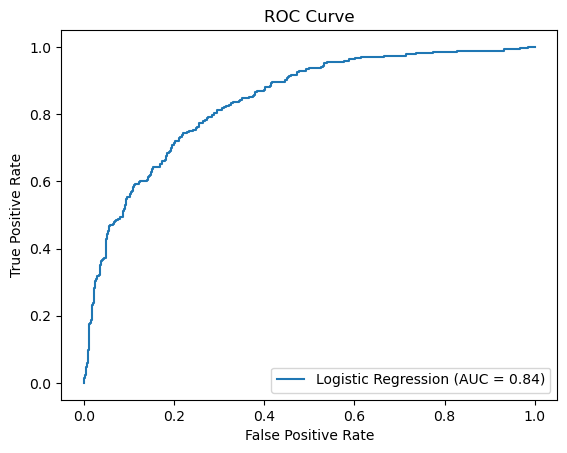

In [3]:
fpr, tpr, _ = roc_curve(y, y_pred_prob)
auc = roc_auc_score(y, y_pred_prob)

# Plot ROC curve
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {auc:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="best")
plt.show()

In [4]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()
loo.get_n_splits(X_scaled) #Finds the number of splits LOO will perform (Length of X)

error_rates = []

#Loops through the entire data because of get_n_splits
for train_idx, test_idx in loo.split(X_scaled):
    
    #Creating the training/testing data for x and y
    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]  

    # Fiting model and creating model
    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)

    # acts as a zero one loss function to find the error
    error_rates.append(1 if y_test_pred[0] != y_test.iloc[0] else 0)

# We have a list of errors and we are taking the summation of all the correct over everything
# would look like this Average of (1- (true positive + true negative / everything))
loo_error_rate = np.mean(error_rates)
print(f'LOOCV Error Rate: {round(loo_error_rate,3)}')

LOOCV Error Rate: 0.224


In [5]:
from sklearn.model_selection import cross_val_score

# Using  the actyal cross_val_score to verify and check if the function above is correct

# we are taking 1 - accuracy of the model
# similar idea to zero one error except its reversed so it is 1 - mean()
loocv_error_rate = 1 - np.mean(cross_val_score(model, X_scaled, y, cv=LeaveOneOut()))
print(f'LOOCV Error Rate (using cross_val_score): {round(loocv_error_rate,3)}')

if (round(loo_error_rate,3) == round(loocv_error_rate,3)):
    print("Both of the Errors match")
else: 
    print("No match")
#errors match!

LOOCV Error Rate (using cross_val_score): 0.224
Both of the Errors match


LDA Error Rate: 0.21614583333333334
LDA Sensitivity: 0.582089552238806
LDA Specificity: 0.892


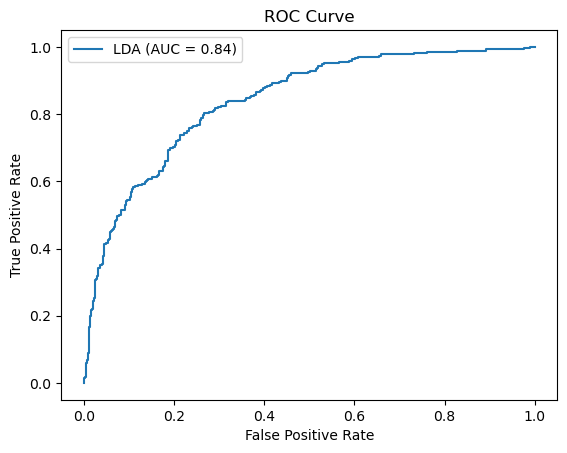

In [6]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

#creating the LDA model, similar to previous miniproject
lda_model = LDA()
lda_model.fit(X_scaled, y)
y_pred_lda = lda_model.predict(X_scaled)
y_pred_prob_lda = lda_model.predict_proba(X_scaled)[:,1]

# same performance metrics as above just for lda now
cm_lda = confusion_matrix(y, y_pred_lda)
tn_lda, fp_lda, fn_lda, tp_lda = cm_lda.ravel()

# inverse of accuracy , everything wrong / everything
error_rate_lda = (fp_lda + fn_lda) / (fp_lda + fn_lda + tn_lda + tp_lda) 

# definition of sensitivity/specificity
sensitivity_lda = tp_lda / (tp_lda + fn_lda)
specificity_lda = tn_lda / (tn_lda + fp_lda)
print(f'LDA Error Rate: {error_rate_lda}')
print(f'LDA Sensitivity: {sensitivity_lda}')
print(f'LDA Specificity: {specificity_lda}')

# ROC Curve and AUC
fpr_lda, tpr_lda, _ = roc_curve(y, y_pred_prob_lda)
auc_lda = roc_auc_score(y, y_pred_prob_lda)
plt.plot(fpr_lda, tpr_lda, label=f"LDA (AUC = {auc_lda:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="best")
plt.title("ROC Curve")
plt.show()

In [7]:
loo = LeaveOneOut()
error_rates = []
#this is just the exact same model as above EXCEPT FOR LDA
for train_idx, test_idx in loo.split(X_scaled):
    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    lda_model.fit(X_train, y_train) #uses LDA model now 
    y_test_pred = lda_model.predict(X_test)
    error_rates.append(1 if y_test_pred[0] != y_test.iloc[0] else 0)

loo_error_rate = np.mean(error_rates)
print(f'LOOCV Error Rate for LDA: {round(loo_error_rate, 3)}')

LOOCV Error Rate for LDA: 0.225


QDA Error Rate: 0.23567708333333334
QDA Sensitivity: 0.5783582089552238
QDA Specificity: 0.864


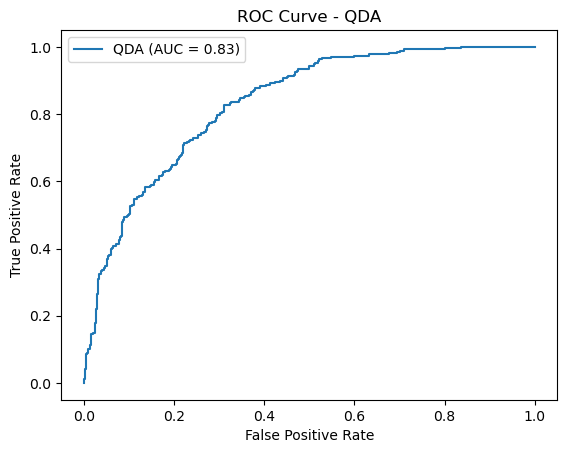

In [8]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

#creating QDA the model, similar to previous miniproject
qda_model = QDA()
qda_model.fit(X_scaled, y)
y_pred_qda = qda_model.predict(X_scaled)
y_pred_prob_qda = qda_model.predict_proba(X_scaled)[:, 1]

# Confusion matrix to calculate sensitivity and specificity
cm_qda = confusion_matrix(y, y_pred_qda)
tn_qda, fp_qda, fn_qda, tp_qda = cm_qda.ravel()

# error (all false / everything)
error_rate_qda = (fp_qda + fn_qda) / (fp_qda + fn_qda + tp_qda + tn_qda)

#def. of sensitivity and specificity 
sensitivity_qda = tp_qda / (tp_qda + fn_qda)  
specificity_qda = tn_qda / (tn_qda + fp_qda)  
print(f'QDA Error Rate: {error_rate_qda}')
print(f'QDA Sensitivity: {sensitivity_qda}')
print(f'QDA Specificity: {specificity_qda}')

# outputting same ROC/AUC curve as earlier
fpr_qda, tpr_qda, _ = roc_curve(y, y_pred_prob_qda)
auc_qda = roc_auc_score(y, y_pred_prob_qda)
plt.plot(fpr_qda, tpr_qda, label=f"QDA (AUC = {auc_qda:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - QDA")
plt.legend(loc="best")
plt.show()

In [9]:
# LOOCV error rate calculation
loo = LeaveOneOut()
error_rates = []

#Exact same model as above except its for QDA
for train_idx, test_idx in loo.split(X_scaled):
    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    qda_model.fit(X_train, y_train) #QDA MODEL NOW INSTEAD
    y_test_pred = qda_model.predict(X_test)
    error_rates.append(1 if y_test_pred[0] != y_test.iloc[0] else 0)

loo_error_rate_qda = np.mean(error_rates)
print(f'LOOCV Error Rate for QDA: {round(loo_error_rate_qda, 3)}')

LOOCV Error Rate for QDA: 0.26


Naive Bayes Error Rate: 0.23697916666666666
Naive Bayes Sensitivity: 0.6156716417910447
Naive Bayes Specificity: 0.842


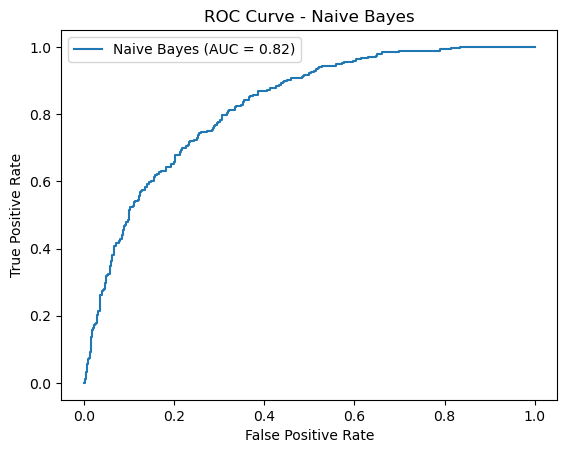

In [10]:
from sklearn.naive_bayes import GaussianNB

# creating and fitting naive bayes model
nb_model = GaussianNB()
nb_model.fit(X_scaled, y)

# creating predictions for the model
y_pred_nb = nb_model.predict(X_scaled)
y_pred_prob_nb = nb_model.predict_proba(X_scaled)[:, 1]

# same as above (dont want to make redundant comments)
cm_nb = confusion_matrix(y, y_pred_nb)
tn_nb, fp_nb, fn_nb, tp_nb = cm_nb.ravel()
error_rate_nb = (fp_nb + fn_nb) / len(y) #alternative method to get error (taking length (same thing))
sensitivity_nb = tp_nb / (tp_nb + fn_nb)  
specificity_nb = tn_nb / (tn_nb + fp_nb)  
print(f'Naive Bayes Error Rate: {error_rate_nb}')
print(f'Naive Bayes Sensitivity: {sensitivity_nb}')
print(f'Naive Bayes Specificity: {specificity_nb}')

#plotting curve for Naive Bayes
fpr_nb, tpr_nb, _ = roc_curve(y, y_pred_prob_nb)
auc_nb = roc_auc_score(y, y_pred_prob_nb)
plt.plot(fpr_nb, tpr_nb, label=f"Naive Bayes (AUC = {auc_nb:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Naive Bayes")
plt.legend(loc="best")
plt.show()

In [11]:
loo = LeaveOneOut()
error_rates = []

#Same model as above
for train_idx, test_idx in loo.split(X_scaled):
    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    nb_model.fit(X_train, y_train) #now implementing Naive Bayes instead
    y_test_pred = nb_model.predict(X_test)
    error_rates.append(1 if y_test_pred[0] != y_test.iloc[0] else 0)

loo_error_rate_nb = np.mean(error_rates)
print(f'LOOCV Error Rate for Naive Bayes: {round(loo_error_rate_nb, 3)}')

LOOCV Error Rate for Naive Bayes: 0.246


Logistic Regression Error Rate: 0.21614583333333334
Logistic Regression Sensitivity: 0.582089552238806
Logistic Regression Specificity: 0.892


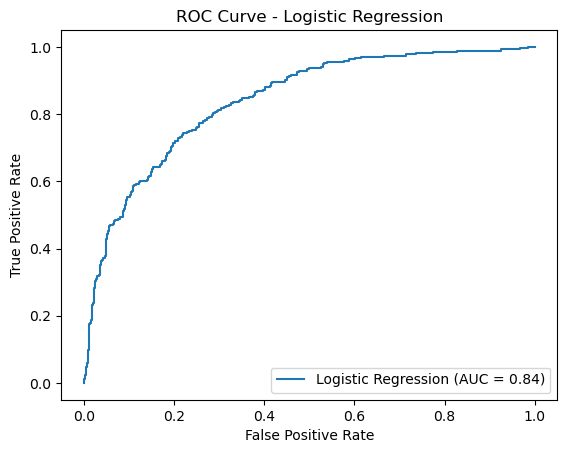

In [12]:
# Model is outputted above
y_pred_log = model.predict(X_scaled)
y_pred_prob_log = model.predict_proba(X_scaled)[:, 1]

# Confusion matrix to calculate sensitivity and specificity
cm_log = confusion_matrix(y, y_pred_log)
tn_log, fp_log, fn_log, tp_log = cm_log.ravel()
error_rate_log = (fp_log + fn_log) / len(y)
sensitivity_log = tp_log / (tp_log + fn_log)  
specificity_log = tn_log / (tn_log + fp_log) 
print(f'Logistic Regression Error Rate: {error_rate_log}')
print(f'Logistic Regression Sensitivity: {sensitivity_log}')
print(f'Logistic Regression Specificity: {specificity_log}')

# ROC Curve and AUC for Logistic Regression
fpr_log, tpr_log, _ = roc_curve(y, y_pred_prob_log)
auc_log = roc_auc_score(y, y_pred_prob_log)

# Plot ROC curve
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {auc_log:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend(loc="best")
plt.show()

In [13]:
loo = LeaveOneOut()
error_rates = []

#same as above
for train_idx, test_idx in loo.split(X_scaled):
    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    model.fit(X_train, y_train) #now implements log reg model
    y_test_pred = model.predict(X_test)
    error_rates.append(1 if y_test_pred[0] != y_test.iloc[0] else 0)

loo_error_rate_log = np.mean(error_rates)
print(f'LOOCV Error Rate for Logistic Regression: {round(loo_error_rate_log, 3)}')

LOOCV Error Rate for Logistic Regression: 0.224


In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import LeaveOneOut, cross_val_score

# the range of K values to evaluate 
k_values = list(range(1, 31))  # using different samples of K (i found 24 as optimal)
loo = LeaveOneOut()

# variables to find optimal K
optimal_k = 1 
lowest_error_rate = 1 #taking an arbitrary value of worst case scenario

# Loop through different K values
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Use LOOCV to find error rate with cross validation
    loo_error = 1 - np.mean(cross_val_score(knn, X_scaled, y, cv=loo, scoring='accuracy'))
    print(f'K = {k}, LOOCV Error Rate = {loo_error:.4f}') # printing the K and the error per iteration
    
    # Trying to find the best k with lowest error rate 
    if loo_error < lowest_error_rate:
        lowest_error_rate = loo_error
        optimal_k = k

print(f'Optimal K was: {optimal_k} with LOOCV Error Rate = {lowest_error_rate:.4f}')

K = 1, LOOCV Error Rate = 0.2930
K = 2, LOOCV Error Rate = 0.2891
K = 3, LOOCV Error Rate = 0.2643
K = 4, LOOCV Error Rate = 0.2643
K = 5, LOOCV Error Rate = 0.2578
K = 6, LOOCV Error Rate = 0.2682
K = 7, LOOCV Error Rate = 0.2604
K = 8, LOOCV Error Rate = 0.2695
K = 9, LOOCV Error Rate = 0.2604
K = 10, LOOCV Error Rate = 0.2604
K = 11, LOOCV Error Rate = 0.2513
K = 12, LOOCV Error Rate = 0.2643
K = 13, LOOCV Error Rate = 0.2630
K = 14, LOOCV Error Rate = 0.2604
K = 15, LOOCV Error Rate = 0.2630
K = 16, LOOCV Error Rate = 0.2578
K = 17, LOOCV Error Rate = 0.2552
K = 18, LOOCV Error Rate = 0.2526
K = 19, LOOCV Error Rate = 0.2578
K = 20, LOOCV Error Rate = 0.2448
K = 21, LOOCV Error Rate = 0.2409
K = 22, LOOCV Error Rate = 0.2500
K = 23, LOOCV Error Rate = 0.2396
K = 24, LOOCV Error Rate = 0.2357
K = 25, LOOCV Error Rate = 0.2422
K = 26, LOOCV Error Rate = 0.2500
K = 27, LOOCV Error Rate = 0.2539
K = 28, LOOCV Error Rate = 0.2487
K = 29, LOOCV Error Rate = 0.2539
K = 30, LOOCV Error Rat

KNN (K=24) Error Rate: 0.22265625
KNN (K=24) Sensitivity: 0.5149253731343284
KNN (K=24) Specificity: 0.918


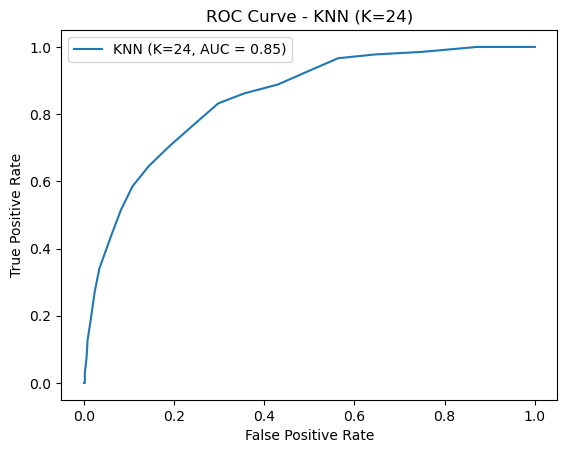

In [15]:
# basic model fitting and predicting
optimal_knn = KNeighborsClassifier(n_neighbors=optimal_k)
optimal_knn.fit(X_scaled, y)
y_pred_knn = optimal_knn.predict(X_scaled)
y_pred_prob_knn = optimal_knn.predict_proba(X_scaled)[:, 1]

# same confusion matrix calculations as other parts
cm_knn = confusion_matrix(y, y_pred_knn)
tn_knn, fp_knn, fn_knn, tp_knn = cm_knn.ravel()
error_rate_knn = (fp_knn + fn_knn) / len(y)
sensitivity_knn = tp_knn / (tp_knn + fn_knn)
specificity_knn = tn_knn / (tn_knn + fp_knn)  
print(f'KNN (K={optimal_k}) Error Rate: {error_rate_knn}')
print(f'KNN (K={optimal_k}) Sensitivity: {sensitivity_knn}')
print(f'KNN (K={optimal_k}) Specificity: {specificity_knn}')

# Plotting ROC/AUC for KNN
fpr_knn, tpr_knn, _ = roc_curve(y, y_pred_prob_knn)
auc_knn = roc_auc_score(y, y_pred_prob_knn)
plt.plot(fpr_knn, tpr_knn, label=f"KNN (K={optimal_k}, AUC = {auc_knn:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve - KNN (K={optimal_k})")
plt.legend(loc="best")
plt.show()

In [16]:
loo = LeaveOneOut()
error_rates = []

#same as above
for train_idx, test_idx in loo.split(X_scaled):
    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    optimal_knn.fit(X_train, y_train) #now fits knn model 
    y_test_pred = optimal_knn.predict(X_test)
    error_rates.append(1 if y_test_pred[0] != y_test.iloc[0] else 0)

loo_error_rate_knn = np.mean(error_rates)
print(f'LOOCV Error Rate for KNN: {round(loo_error_rate_knn, 3)}')

LOOCV Error Rate for KNN: 0.236
